In [4]:
import pandas as pd

# File path
file_path = r'C:/Users/USER/Downloads/GSE263588_Expression_Profile.GRCh38.gene.txt.gz'

# Load the file into a DataFrame
df = pd.read_csv(file_path, sep='\t', compression='gzip')

# View basic info
print("DataFrame shape:", df.shape)
print(df.head())


DataFrame shape: (46427, 157)
   Gene_ID                                      Transcript_ID Gene_Symbol  \
0        1                                          NM_130786        A1BG   
1        2  NM_000014,NM_001347423,NM_001347424,NM_0013474...         A2M   
2        3                                          NR_040112       A2MP1   
3        9  NM_000662,NM_001160170,NM_001160171,NM_0011601...        NAT1   
4       10                             NM_000015,XM_017012938        NAT2   

                          Description            gene_biotype  \
0              alpha-1-B glycoprotein          protein_coding   
1               alpha-2-macroglobulin          protein_coding   
2  alpha-2-macroglobulin pseudogene 1  transcribed_pseudogene   
3               N-acetyltransferase 1          protein_coding   
4               N-acetyltransferase 2          protein_coding   

                                          Protein_ID  HGNC     MIM Ensembl  \
0                                     

C:\Users\USER\AppData\Local\Temp\ipykernel_18448\4041534267.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t', compression='gzip')


In [ ]:
# Filter only for the genes  interested in
genes_of_interest = ['TP53', 'BRCA1', 'ATM', 'HSP90AA1', 'SOD2']
df_filtered = df[df['Gene_Symbol'].isin(genes_of_interest)]

# View filtered genes
print(df_filtered[['Gene_Symbol'] + [col for col in df.columns if col.endswith('_TPM')]].head())


     Gene_Symbol  GBL_105_TPM  GBL_117_TPM  GBL_121_TPM  GBL_12_TPM  \
364          ATM    14.014220    11.797006    18.665795    5.556706   
515        BRCA1     5.834191    16.744139     8.147165    9.587453   
2427    HSP90AA1   673.439583   559.775306   771.601351  919.880862   
4849        SOD2   203.795236   162.985987    12.108959  120.505559   
5282        TP53    37.888613    28.072000    89.409380   29.939923   

      GBL_13_TPM  GBL_142_TPM  GBL_153_TPM  GBL_158_TPM   GBL_15_TPM  ...  \
364    23.007510    17.523746    21.174914    30.809074    15.917140  ...   
515     1.351682    13.799322     6.291319     8.227077    26.458751  ...   
2427  417.312454   643.642907   390.054560   491.698612  1586.923440  ...   
4849   34.164626    25.030957    30.509680    59.304741    22.442825  ...   
5282   22.501055    33.766652    23.521035    15.837605    59.267735  ...   

      GBL_36_TPM  GBL_37_TPM   GBL_68_TPM  GBL_70_TPM   GBL_72_TPM  \
364     8.328534   17.536684    13.95208

In [6]:
# Extract only the TPM columns
tpm_cols = [col for col in df.columns if col.endswith('_TPM')]
expr_matrix = df_filtered[['Gene_Symbol'] + tpm_cols]

# Transpose so rows = samples, columns = genes
expr_matrix = expr_matrix.set_index('Gene_Symbol').T

# Rename index to be sample IDs
expr_matrix.index.name = 'Sample_ID'
expr_matrix.reset_index(inplace=True)

# Add Target column (1 = GBM, 0 = Normal)
expr_matrix['Target'] = expr_matrix['Sample_ID'].apply(lambda x: 1 if 'GBL' in x else 0)

# Final output
print(expr_matrix.head())


Gene_Symbol    Sample_ID        ATM      BRCA1    HSP90AA1        SOD2  \
0            GBL_105_TPM  14.014220   5.834191  673.439583  203.795236   
1            GBL_117_TPM  11.797006  16.744139  559.775306  162.985987   
2            GBL_121_TPM  18.665795   8.147165  771.601351   12.108959   
3             GBL_12_TPM   5.556706   9.587453  919.880862  120.505559   
4             GBL_13_TPM  23.007510   1.351682  417.312454   34.164626   

Gene_Symbol       TP53  Target  
0            37.888613       1  
1            28.072000       1  
2            89.409380       1  
3            29.939923       1  
4            22.501055       1  


In [9]:
import pandas as pd

# Replace with actual file path
file = r'C:/Users/USER/Downloads/GSE119834_fpkm_table.txt.gz'
df = pd.read_csv(file, sep='\t', index_col=0)
print(df.shape)  # e.g., (20k genes, 104 samples)

# Keep your genes of interest
genes = ['TP53','BRCA1','ATM','HSP90AA1','SOD2']
subset = df.loc[genes]

# Transpose to have samples as rows
expr = subset.T.reset_index().rename(columns={'index':'Sample_ID'})
expr['Target'] = expr['Sample_ID'].apply(lambda x: 0 if 'NSC' in x else 1)

print(expr.head())


(19471, 98)
symbol Sample_ID       TP53      BRCA1        ATM    HSP90AA1       SOD2  \
0          GSC34  17.481101   4.840529   9.334950  100.744373  45.271966   
1           GSC2  25.405382   5.339240   6.811265  166.207682  25.790753   
2          GSC35  18.881995   1.566974  10.986399   75.775144  27.948667   
3          GSC39  34.443381   9.573346  10.895043  135.270784  24.576757   
4          GSC24  23.277268  11.516858   5.508510  251.105975  60.922421   

symbol  Target  
0            1  
1            1  
2            1  
3            1  
4            1  


Matplotlib is building the font cache; this may take a moment.


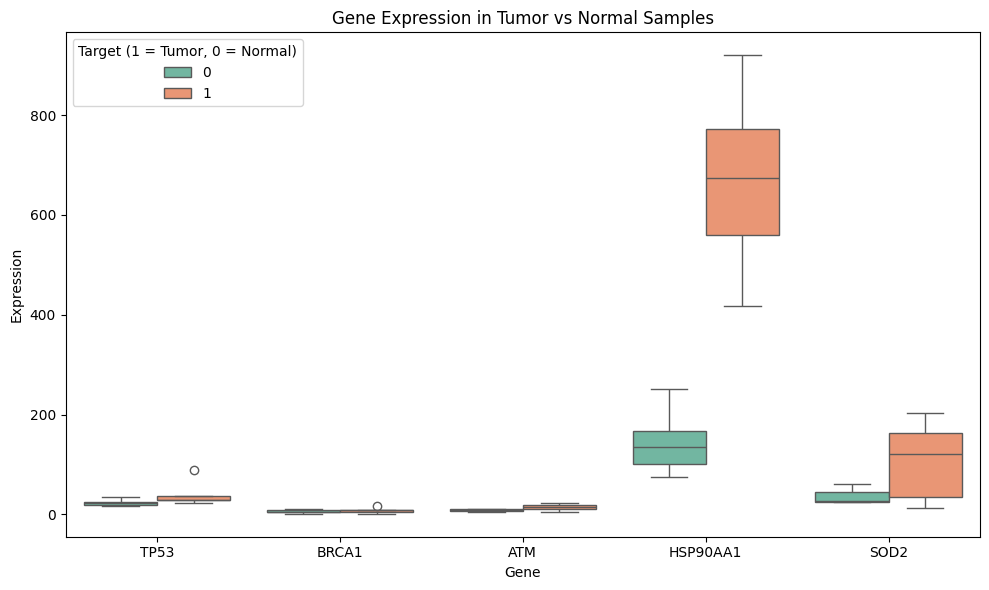

In [ ]:
# gene expression between tumors and normals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tumor data
tumor_data = pd.DataFrame({
    'Sample_ID': ['GBL_105_TPM', 'GBL_117_TPM', 'GBL_121_TPM', 'GBL_12_TPM', 'GBL_13_TPM'],
    'TP53': [37.88, 28.07, 89.4, 29.93, 22.5],
    'BRCA1': [5.83, 16.74, 8.14, 9.58, 1.35],
    'ATM': [14.01, 11.79, 18.66, 5.55, 23],
    'HSP90AA1': [673.43, 559.77, 771.6, 919.88, 417.31],
    'SOD2': [203.79, 162.98, 12.1, 120.5, 34.16],
    'Target': [1, 1, 1, 1, 1]
})

# Normal data
normal_data = pd.DataFrame({
    'Sample_ID': ['GSC34', 'GSC2', 'GSC35', 'GSC39', 'GSC24'],
    'TP53': [17.48, 25.4, 18.88, 34.44, 23.28],
    'BRCA1': [4.84, 5.34, 1.56, 9.57, 11.52],
    'ATM': [9.33, 6.81, 10.99, 10.89, 5.51],
    'HSP90AA1': [100.74, 166.21, 75.78, 135.27, 251.11],
    'SOD2': [45.27, 25.79, 27.95, 24.58, 60.92],
    'Target': [0, 0, 0, 0, 0]
})

# Combine datasets
combined_df = pd.concat([tumor_data, normal_data], ignore_index=True)

# Melt the dataframe for seaborn plotting
df_melted = pd.melt(combined_df, 
                    id_vars=['Sample_ID', 'Target'], 
                    value_vars=['TP53', 'BRCA1', 'ATM', 'HSP90AA1', 'SOD2'],
                    var_name='Gene', 
                    value_name='Expression')

# Plot boxplots by gene and Target
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Gene', y='Expression', hue='Target', palette='Set2')
plt.title('Gene Expression in Tumor vs Normal Samples')
plt.legend(title='Target (1 = Tumor, 0 = Normal)')
plt.tight_layout()

# Save the plot
plt.savefig('expression_comparison_boxplot.png')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11480\1853305775.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gene', y='Expression', data=tumor_melt, palette='Reds')


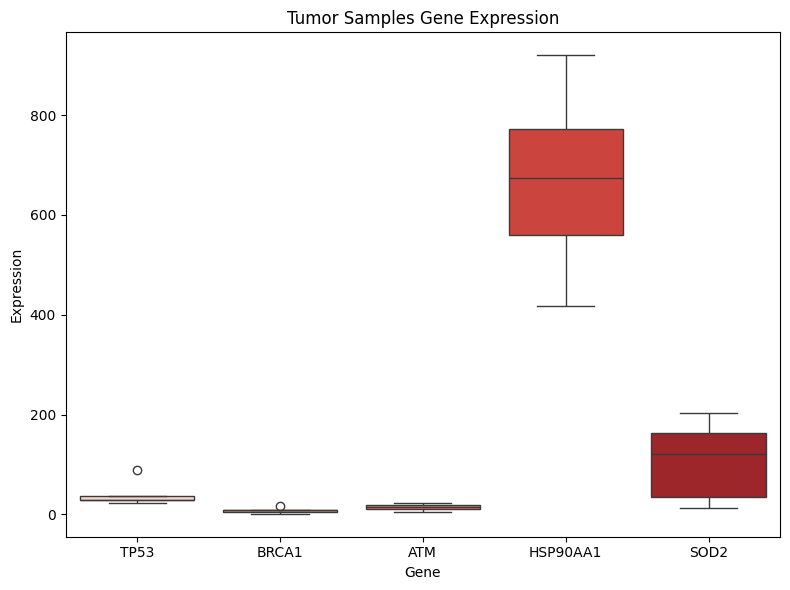

In [ ]:
# Gene expression of tumors samples
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tumor data
tumor_data = pd.DataFrame({
    'Sample_ID': ['GBL_105_TPM', 'GBL_117_TPM', 'GBL_121_TPM', 'GBL_12_TPM', 'GBL_13_TPM'],
    'TP53': [37.88, 28.07, 89.4, 29.93, 22.5],
    'BRCA1': [5.83, 16.74, 8.14, 9.58, 1.35],
    'ATM': [14.01, 11.79, 18.66, 5.55, 23],
    'HSP90AA1': [673.43, 559.77, 771.6, 919.88, 417.31],
    'SOD2': [203.79, 162.98, 12.1, 120.5, 34.16]
})

# Melt for plotting
tumor_melt = tumor_data.melt(id_vars='Sample_ID', var_name='Gene', value_name='Expression')

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gene', y='Expression', data=tumor_melt, palette='Reds')
plt.title('Tumor Samples Gene Expression')
plt.tight_layout()
plt.savefig('tumor_expression_boxplot.png')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_11480\2833555352.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gene', y='Expression', data=normal_melt, palette='Blues')


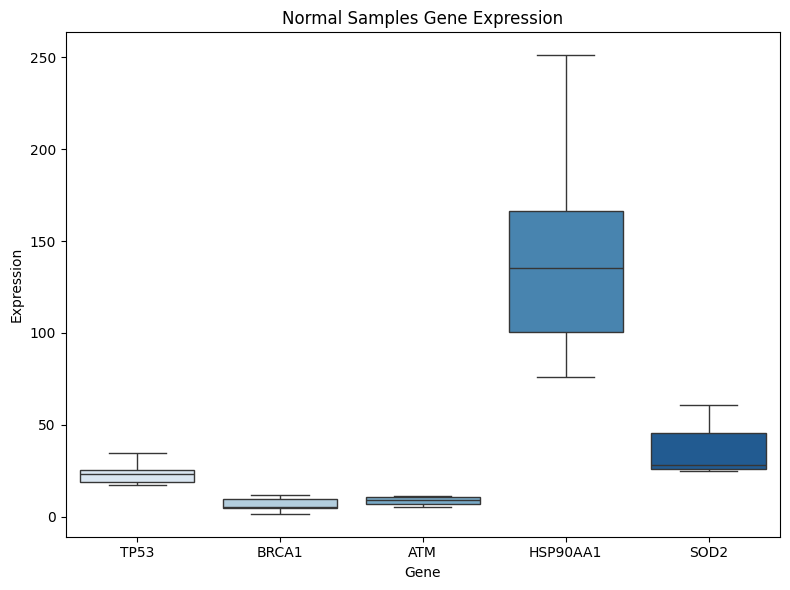

In [ ]:
# Normal data gene expressions values
normal_data = pd.DataFrame({
    'Sample_ID': ['GSC34', 'GSC2', 'GSC35', 'GSC39', 'GSC24'],
    'TP53': [17.48, 25.4, 18.88, 34.44, 23.28],
    'BRCA1': [4.84, 5.34, 1.56, 9.57, 11.52],
    'ATM': [9.33, 6.81, 10.99, 10.89, 5.51],
    'HSP90AA1': [100.74, 166.21, 75.78, 135.27, 251.11],
    'SOD2': [45.27, 25.79, 27.95, 24.58, 60.92]
})

# Melt for plotting
normal_melt = normal_data.melt(id_vars='Sample_ID', var_name='Gene', value_name='Expression')

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gene', y='Expression', data=normal_melt, palette='Blues')
plt.title('Normal Samples Gene Expression')
plt.tight_layout()
plt.savefig('normal_expression_boxplot.png')
plt.show()


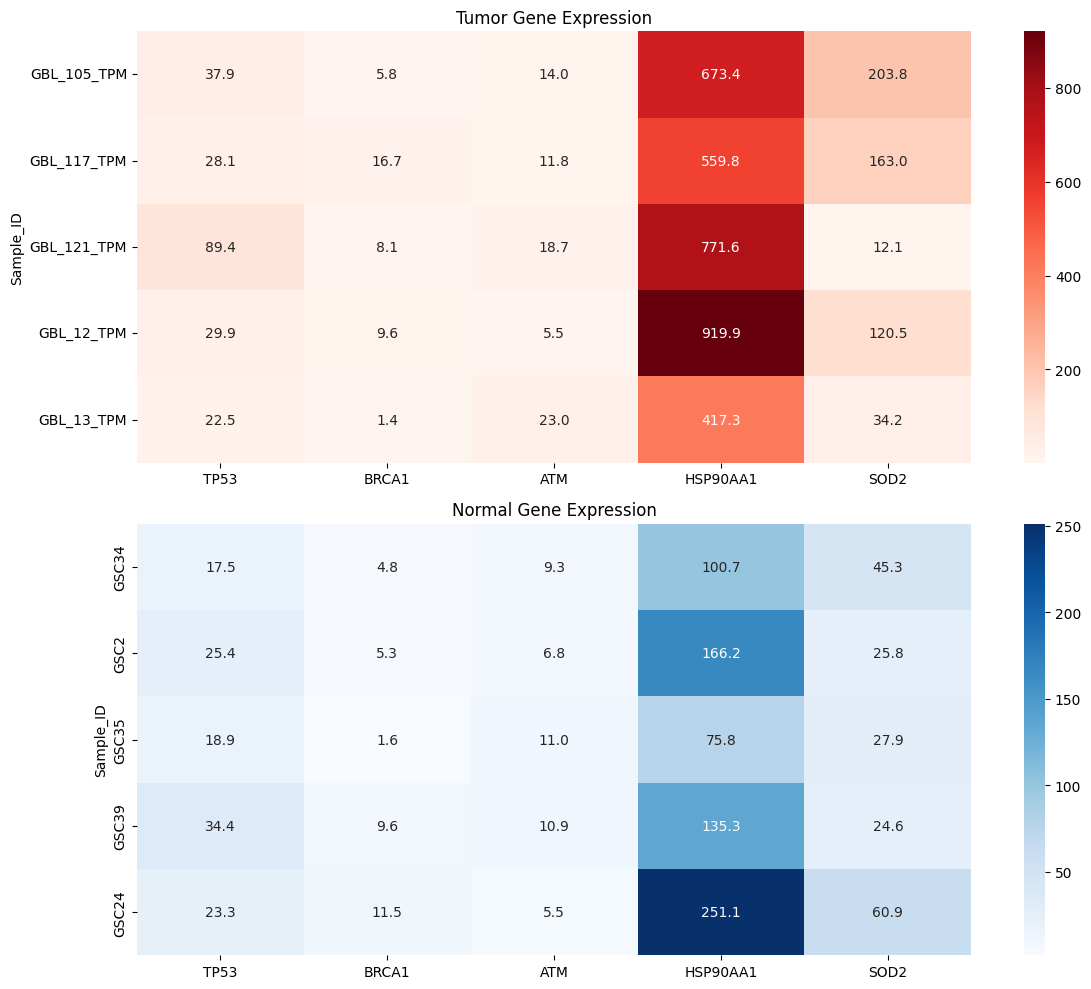

In [ ]:
# heat map of data normals vs tumors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tumor data
tumor_data = {
    "Sample_ID": ["GBL_105_TPM", "GBL_117_TPM", "GBL_121_TPM", "GBL_12_TPM", "GBL_13_TPM"],
    "TP53": [37.88, 28.07, 89.4, 29.93, 22.5],
    "BRCA1": [5.83, 16.74, 8.14, 9.58, 1.35],
    "ATM": [14.01, 11.79, 18.66, 5.55, 23.0],
    "HSP90AA1": [673.43, 559.77, 771.6, 919.88, 417.31],
    "SOD2": [203.79, 162.98, 12.1, 120.5, 34.16]
}
df_tumor = pd.DataFrame(tumor_data).set_index("Sample_ID")

# Normal data
normal_data = {
    "Sample_ID": ["GSC34", "GSC2", "GSC35", "GSC39", "GSC24"],
    "TP53": [17.48, 25.41, 18.88, 34.44, 23.28],
    "BRCA1": [4.84, 5.34, 1.57, 9.57, 11.52],
    "ATM": [9.33, 6.81, 10.99, 10.9, 5.51],
    "HSP90AA1": [100.74, 166.21, 75.78, 135.27, 251.11],
    "SOD2": [45.27, 25.79, 27.95, 24.58, 60.92]
}
df_normal = pd.DataFrame(normal_data).set_index("Sample_ID")

# Create heatmaps
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.heatmap(df_tumor, cmap="Reds", annot=True, fmt=".1f", ax=axes[0])
axes[0].set_title("Tumor Gene Expression")

sns.heatmap(df_normal, cmap="Blues", annot=True, fmt=".1f", ax=axes[1])
axes[1].set_title("Normal Gene Expression")

plt.tight_layout()
plt.show()


In [5]:
plt.savefig("gene_expression_heatmaps.png", dpi=300)


<Figure size 640x480 with 0 Axes>